# выявление зависимостей между признаками  в данных о пассажирах Титаника и выживанием после кораблекрушения

### Исследование   о сгенерированных пассажирах Титаника

<a id='intro'></a>

##### Описание исследования.


_____
##### Цель исследования.

1. проанализировать данные с целью выявления параметров, определяющих большую вероятность на выживание




    
_____
##### Задачи исследования.

* Изучить данные
* Произвести обработку данных
* Произвести исследовательский анализ данных

_____





##### Исходные данные.
    
Согласно документации к данным:


* Name - Имя
* PassengerId Id пассажира
* Survived	Выжил	(0 = No, 1 = Yes)
* pclass	-класс билета	(1 = 1st, 2 = 2nd, 3 = 3rd)
* sex	 - пол	
* Age	- возраст	
* sibsp	-  братья и сестры / супруги	
* parch	- # родители / дети	
* ticket	- номер билета	
* fare	- цена билета	
* cabin	- номер каюты	
* embarked	- посадка 	(C = Cherbourg, Q = Queenstown, S = Southampton)

pclass: показатель социально-экономического статуса (SES)
1-й = Высший
2-й = средний
3-й = Нижний

возраст: Возраст является дробным, если он меньше 1. Если возраст оценивается, то в форме xx.5

sibsp: Набор данных определяет семейные отношения таким образом...
Sibling = брат, сестра, сводный брат, сводная сестра
Spouse  = муж, жена (любовницы и женихи не учитывались)

parch: Набор данных определяет семейные отношения таким образом...
Parent  = мать, отец
Child  = дочь, сын, падчерица, пасынок
Некоторые дети путешествовали только с няней, поэтому для них parch=0.
______

###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#task1_1)


##### Часть 2. Предобработка  данных:
* [1.Обработка пропусков](#task2_1)
* [2.Создание категориальных признаков](#task2_2)



##### Часть 3. Исследовательский анализ данных:

* [1. Рассмотрение статистических показателей](#task3_1)
* [2. Выявление зависимостей в данных](#task3_2)
* [3. Построение корреляционной матрицы](#task3_3)


##### Часть 4. [Вывод](#task4)

##  Изученеие файлов с данными, получение общей информации, загрузка библиотек. 
<a id='task1_1'></a>

In [1]:
# импортируем библиотеки pandas, numpy и matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#проигнорируем сообщения о предупреждениях
import warnings

warnings.simplefilter('ignore')

In [3]:
# чтение файлов с данными и сохранение их в датафреймы
try:
    df = pd.read_csv('train.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/niksonnn/rss/main/train.csv')


Просмотр первых строк и получение общей информации о данных в таблицах

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Исправим названия столбцов

In [5]:
#приведем названия признаков к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   passengerid  100000 non-null  int64  
 1   survived     100000 non-null  int64  
 2   pclass       100000 non-null  int64  
 3   name         100000 non-null  object 
 4   sex          100000 non-null  object 
 5   age          96708 non-null   float64
 6   sibsp        100000 non-null  int64  
 7   parch        100000 non-null  int64  
 8   ticket       95377 non-null   object 
 9   fare         99866 non-null   float64
 10  cabin        32134 non-null   object 
 11  embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [457]:
#Посмотрим количество уникальных значений имен
df.name.nunique()

92144

In [458]:
#Посмотрим количество уникальных значений билетов
df.ticket.nunique()

75331

In [459]:
# 
df.sibsp.value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: sibsp, dtype: int64

In [460]:
# 
df['parch'].value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: parch, dtype: int64

In [461]:
# Посмотрим уникальные значения 
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [462]:
#Посмотрим всего пропущенных значений
df.isna().sum()

passengerid        0
survived           0
pclass             0
name               0
sex                0
age             3292
sibsp              0
parch              0
ticket          4623
fare             134
cabin          67866
embarked         250
dtype: int64

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   passengerid  100000 non-null  int64  
 1   survived     100000 non-null  int64  
 2   pclass       100000 non-null  int64  
 3   name         100000 non-null  object 
 4   sex          100000 non-null  object 
 5   age          96708 non-null   float64
 6   sibsp        100000 non-null  int64  
 7   parch        100000 non-null  int64  
 8   ticket       95377 non-null   object 
 9   fare         99866 non-null   float64
 10  cabin        32134 non-null   object 
 11  embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


### Вывод


Итак, имеется  таблица с данными о сгенерированных пассажирах Титаника, большое количество пропущенных значений в столбцах **age - 3292, ticket - 4623, cabin - 67866**.  Также в столбце **fare - 134 и mbarked - 250**  

Возможно есть дубликаты, учитывая количество уникальных имен не совпадающих собщим количеством пассажиров




# Предобработка данных 

## Обработка пропусков

<a id='task2_1'></a>

In [464]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [465]:
#Исправим название колонки  "passengerid"
df.rename(columns = {'passengerid':'passenger_id'}, inplace=True)

In [466]:
#Поиск дубликатов
df.duplicated().sum()

0

In [467]:
# Поиск дубликатов в именах
df[df.name.duplicated()]

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
660,660,0,3,"Crawford, Robert",male,64.0,0,0,W./C. 44193,8.09,NaN,S
778,778,0,3,"Smith, Richard",male,39.0,0,0,32561,7.05,NaN,S
1200,1200,0,3,"Rogers, David",male,NaN,0,0,SOTON/O2 3554016,12.84,NaN,S
1550,1550,0,3,"Moore, Robert",male,9.0,0,0,W./C. 25788,7.20,NaN,S
1669,1669,1,3,"Smith, Cheryl",female,37.0,0,0,11470,20.78,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99966,99966,1,1,"Craddock, Chester",male,46.0,1,0,13554,246.10,C6653,S
99977,99977,0,3,"Moore, Michael",male,52.0,0,3,C.A. 338230,77.25,NaN,S
99978,99978,0,3,"Merritt, John",male,26.0,0,0,NaN,11.44,NaN,S
99987,99987,0,3,"Diaz, Steve",male,24.0,0,3,C.A. 409755,64.55,NaN,S


In [468]:
# Просмотрим выборочно одно имя
df[df.name=='Smith, Richard']

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
278,278,0,2,"Smith, Richard",male,27.0,0,0,STON/O2. 478645,26.98,NaN,S
778,778,0,3,"Smith, Richard",male,39.0,0,0,32561,7.05,NaN,S
9111,9111,0,3,"Smith, Richard",male,25.0,2,0,A/4 477795,30.04,NaN,S
15015,15015,1,2,"Smith, Richard",male,6.0,4,1,19369,64.12,NaN,S
21148,21148,1,2,"Smith, Richard",male,44.0,0,0,42096,30.43,B12719,S
33944,33944,1,3,"Smith, Richard",male,26.0,0,0,224888,8.70,NaN,S
35722,35722,0,3,"Smith, Richard",male,70.0,1,2,446603,28.08,NaN,S
51422,51422,0,3,"Smith, Richard",male,34.0,0,0,494280,26.73,NaN,S
53087,53087,0,3,"Smith, Richard",male,22.0,0,2,220944,10.43,NaN,S
61068,61068,0,2,"Smith, Richard",male,44.0,0,1,234099,10.05,NaN,S


Видимо сгенерированные имена представлены уникальными объектами, дубликатов не обнаружено

In [469]:
df.head()

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Произведем обработку пропущенных значений посредством замены пропущенных значений на медианы групп наиболее близких данным объектам

In [470]:
# Заменим пропуски в столбце 'age'
df['age'] = df['age'].fillna(df.groupby(['pclass','sex','fare',  'parch'])
                                                   ['age'].transform('median'))

In [471]:
# Заменим оставшиеся пропуски в столбце 'age'
df['age'] = df['age'].fillna(df.groupby(['sex', 'parch'])
                                                   ['age'].transform('median'))

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   passenger_id  100000 non-null  int64  
 1   survived      100000 non-null  int64  
 2   pclass        100000 non-null  int64  
 3   name          100000 non-null  object 
 4   sex           100000 non-null  object 
 5   age           100000 non-null  float64
 6   sibsp         100000 non-null  int64  
 7   parch         100000 non-null  int64  
 8   ticket        95377 non-null   object 
 9   fare          99866 non-null   float64
 10  cabin         32134 non-null   object 
 11  embarked      99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [473]:
# Заменим пропуски в столбце 'fare'
df['fare'] = df['fare'].fillna(df.groupby(['pclass','sex','age',  'parch', 'embarked'])
                                                   ['fare'].transform('median'))

In [474]:
# Заменим оставшиеся пропуски в столбце 'fare'
df['fare'] = df['fare'].fillna(df.groupby(['pclass','sex', 'embarked'])
                                                   ['fare'].transform('median'))

In [475]:
# Имеются одинаковые номера билетов
df.ticket.value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: ticket, Length: 75331, dtype: int64

In [476]:
# Посмотрим на выборочное значение 
df[df['ticket'] == 'SC ']

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
344,344,1,3,"Ricks, Jewell",female,26.0,0,0,SC,9.69,NaN,S
775,775,0,3,"Vanvleck, James",male,29.0,0,0,SC,11.16,NaN,S
3501,3501,1,3,"Talley, Marie",female,65.0,0,0,SC,7.44,NaN,S
4806,4806,1,3,"Young, Anne",female,38.0,0,0,SC,9.30,NaN,S
5558,5558,1,3,"Bessette, Sandra",female,36.5,0,0,SC,10.72,NaN,S
5584,5584,0,3,"Pushard, Michelle",female,53.0,0,0,SC,7.37,NaN,S
7166,7166,0,2,"Robinson, Angela",female,24.0,0,0,SC,5.26,NaN,S
8156,8156,1,3,"Bowlin, Carol",female,29.0,0,0,SC,10.48,NaN,S
8607,8607,0,3,"Robinson, Xavier",male,9.0,0,2,SC,9.65,NaN,S
9549,9549,0,3,"Grimaldo, Raphael",male,69.0,0,0,SC,12.14,NaN,S


In [477]:
# Заменим пропуски в столбце 'embarked'
df['embarked'] = df['embarked'].fillna(
            df.groupby(['pclass', 'sibsp', 'parch'])['embarked'].transform(lambda x: x.value_counts().index[0])
                                      )

In [478]:
# Создадим массив с номерами билетов встречающихся чаще 10 
not_uniq_ticket = df.ticket.value_counts().index[df.ticket.value_counts().values > 10]

## Создание категориальных признаков
<a id='task2_2'></a>

Создадим столбец  'ticket_cat'

In [479]:
df['ticket_cat'] = df.ticket[ df.ticket.isin(not_uniq_ticket)]

In [480]:
df['ticket_cat'] = df['ticket_cat'].fillna('unique')

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   passenger_id  100000 non-null  int64  
 1   survived      100000 non-null  int64  
 2   pclass        100000 non-null  int64  
 3   name          100000 non-null  object 
 4   sex           100000 non-null  object 
 5   age           100000 non-null  float64
 6   sibsp         100000 non-null  int64  
 7   parch         100000 non-null  int64  
 8   ticket        95377 non-null   object 
 9   fare          99999 non-null   float64
 10  cabin         32134 non-null   object 
 11  embarked      100000 non-null  object 
 12  ticket_cat    100000 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 9.9+ MB


In [482]:
df.ticket = df.ticket.fillna('unknown')

In [483]:
df['ticket_cat'].value_counts()

unique         98715
A/5              602
C.A.             177
SC/PARIS         145
SOTON/O.Q.        80
SC                57
W./C.             53
A/5.              40
W.E.P.            23
CA                22
STON/O2.          21
CA.               15
PP                15
A/4               12
LP                12
SOTON/OQ          11
Name: ticket_cat, dtype: int64

In [484]:
df.cabin = df.cabin.fillna('unknown')

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   passenger_id  100000 non-null  int64  
 1   survived      100000 non-null  int64  
 2   pclass        100000 non-null  int64  
 3   name          100000 non-null  object 
 4   sex           100000 non-null  object 
 5   age           100000 non-null  float64
 6   sibsp         100000 non-null  int64  
 7   parch         100000 non-null  int64  
 8   ticket        100000 non-null  object 
 9   fare          99999 non-null   float64
 10  cabin         100000 non-null  object 
 11  embarked      100000 non-null  object 
 12  ticket_cat    100000 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 9.9+ MB


In [486]:
df['cab_sym'] = df.cabin.apply(lambda x: x[0])

In [487]:
df.cab_sym.value_counts()

u    67866
C    11825
B     7439
A     6307
D     3637
E     1749
F      663
G      482
T       32
Name: cab_sym, dtype: int64

### Вывод

Пропуска обработаны, созданы категориальные переменные, дубликатов не обнаружено

______

# Исследовательский анализ данных

<a id='task2_1'></a>

## Рассмотрение статистических показателей

<a id='task3_1'></a>

In [258]:
#Посмотрим средние значения, медиану и стандартное отклонение 'age' и 'fare'  
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,is_female
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99999.000000,100000.00000
mean,49999.500000,0.427740,2.106910,38.315223,0.397690,0.454560,43.915643,0.43886
std,28867.657797,0.494753,0.837727,18.127906,0.862566,0.950076,69.552389,0.49625
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000,0.00000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000,0.00000
50%,49999.500000,0.000000,2.000000,38.000000,0.000000,0.000000,24.460000,0.00000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.500000,1.00000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000,1.00000


<AxesSubplot:xlabel='age', ylabel='Density'>

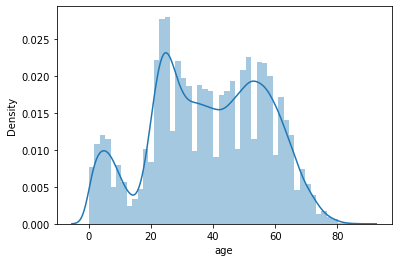

In [14]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='fare', ylabel='Density'>

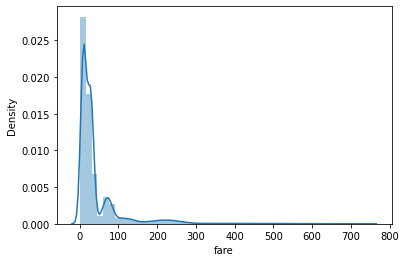

In [15]:
sns.distplot(df['fare'])

* Средне значение возраста - 38, медиана -38, ст.откл.-18
* среднее значение цены - 44, медиана- 24, ст.откл. - 69

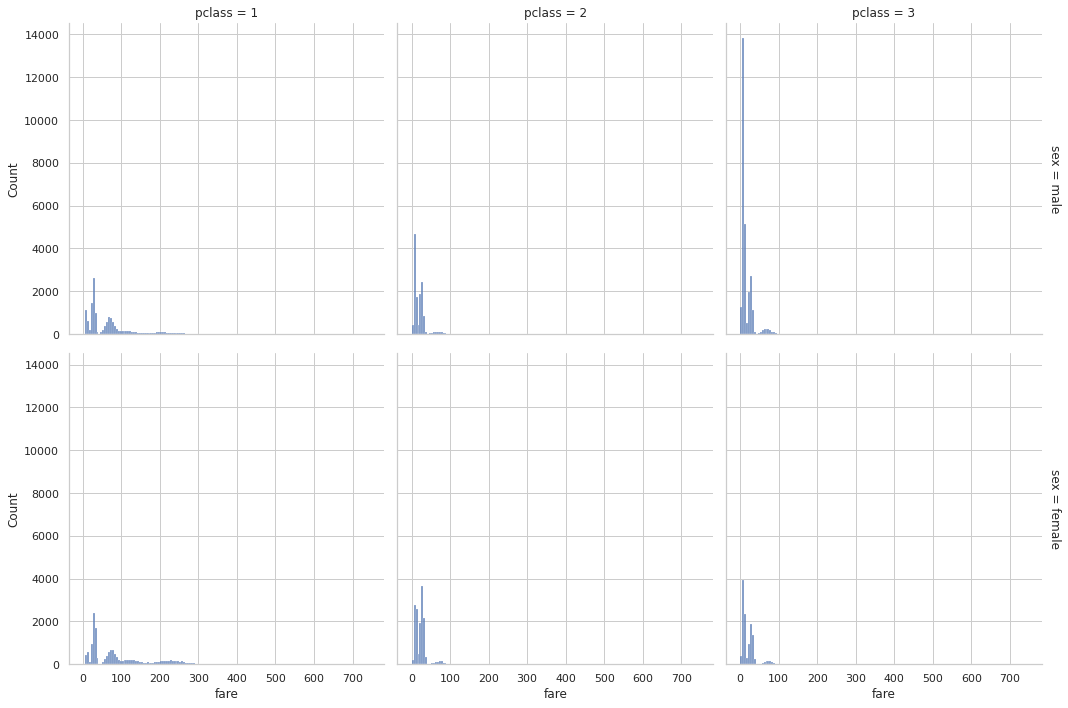

In [324]:
# Визуализируем значения цены в зависимости от класса
sns.displot(
    df, x="fare", col="pclass", row="sex",
    binwidth=5, height=5, facet_kws=dict(margin_titles=True),
)

Text(0.5, 0.98, 'Распределение ценам на билет  по классам, для выживших и нет ')

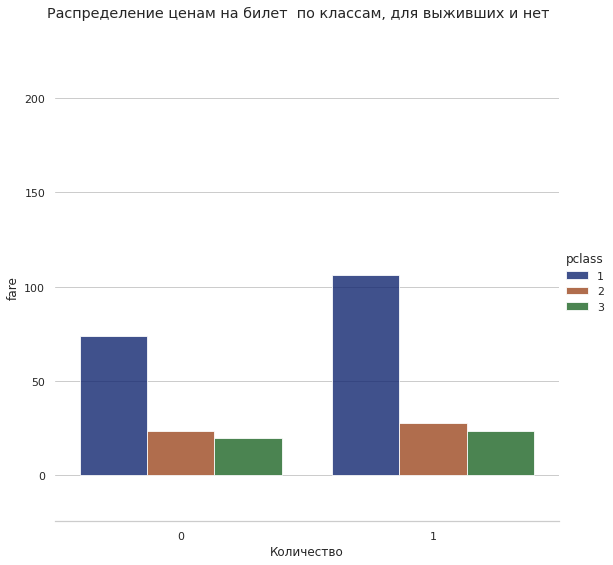

In [326]:
# Визуализируем график 

graph = sns.catplot(
    data=df, kind="bar",
    x="survived", y="fare", hue="pclass",
    ci="sd", palette="dark", alpha=.8, height=8, errwidth=0
)
graph.despine(left=True)
graph.set_axis_labels("Количество") 
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle("Распределение пассажиров по ценам на билет  по классам, для выживших и нет ") 

Интересное сравнение, выжившие больше платили за билет в сравнении с теми кто не выжил, особенно заметно в 1 классе 

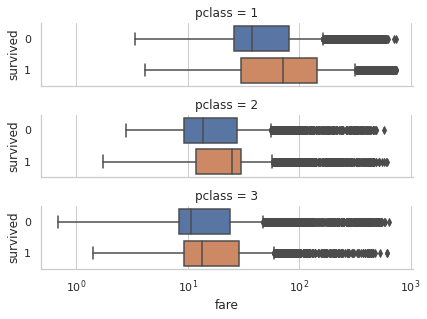

In [327]:
g = sns.catplot(x="fare", y="survived", row="pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df.query("fare > 0"))
g.set(xscale="log")

На графике размаха, хорошо видно что медианные значения цены за билет у выживших пассажиров выше чем у погибших  

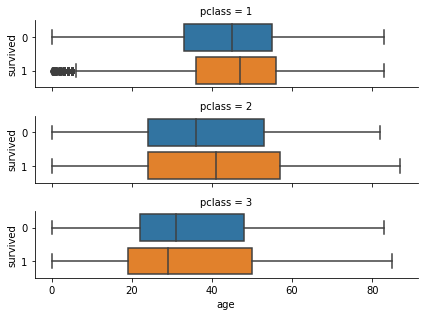

In [12]:
g = sns.catplot(x="age", y="survived", row="pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df.query("fare > 0"))

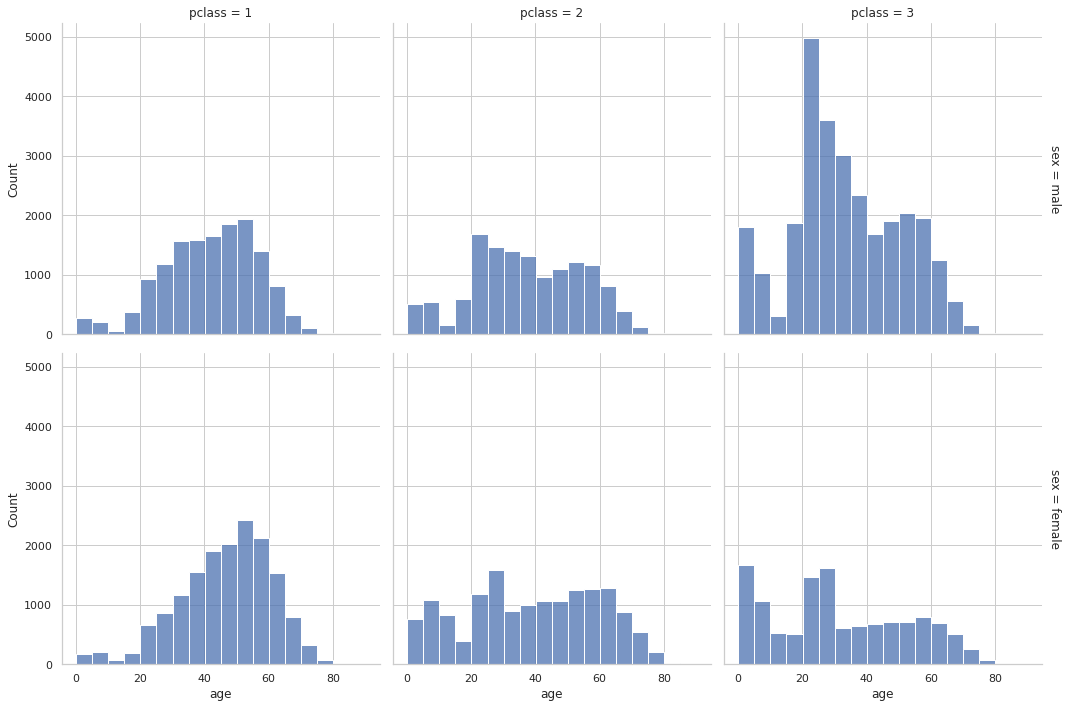

In [330]:
# Рассмотрим распределение пассажиров по  возрасту в зависимости от пола и класса 

sns.displot(df, x='age', col="pclass", row="sex",
    binwidth=5, height=5, facet_kws=dict(margin_titles=True),)

plt.show();

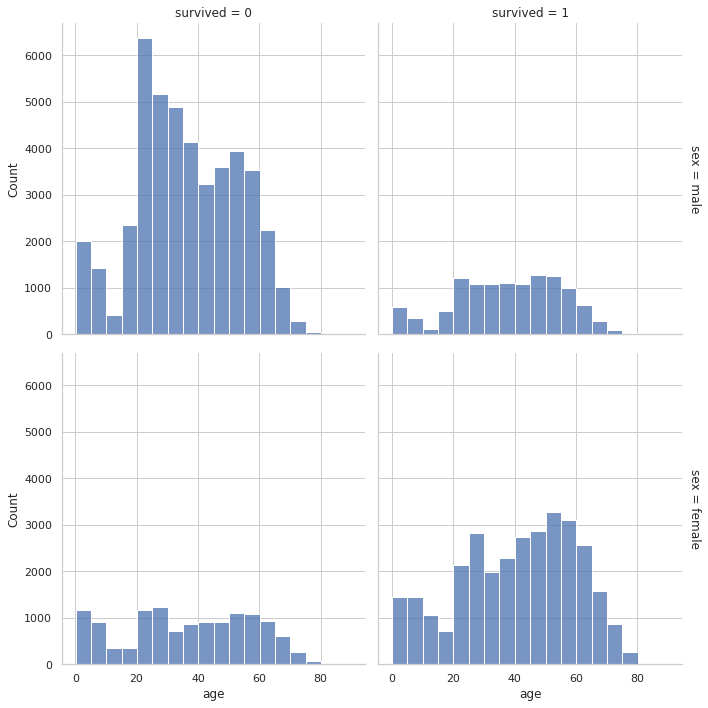

In [263]:
# Рассмотрим распределение пассажиров по  возрасту в зависимости от пола и целевого показателя выживания 
sns.set_theme(style="whitegrid", font='sans-serif', font_scale=1, 
    color_codes=True, rc={"figure.figsize": (15, 10)})

sns.displot(df, x='age', col="survived", row="sex",
    binwidth=5, height=5, facet_kws=dict(margin_titles=True),)
plt.show();

Рассчитаем процентное соотношение выживших пассажиров к общему количеству  в зависимости от пола

In [332]:
df.groupby('sex').survived.sum()

sex
female    31226
male      11548
Name: survived, dtype: int64

In [206]:
df.groupby('sex').survived.sum()/df.groupby('sex').survived.count()

sex
female    0.711525
male      0.205795
Name: survived, dtype: float64

In [52]:
df.sex.value_counts(normalize=True)

male      0.56114
female    0.43886
Name: sex, dtype: float64

In [331]:
df.sex.value_counts()

male      56114
female    43886
Name: sex, dtype: int64

Среди женщин наблюдается намного больший процент выживших - 71% (31226 -выживших из 43886), по сравынению с мужчинами-20%(11548 - выживших из 56114), т.е. среди погибших всего 29 % составляют женщины и почти 80% - мужчины 

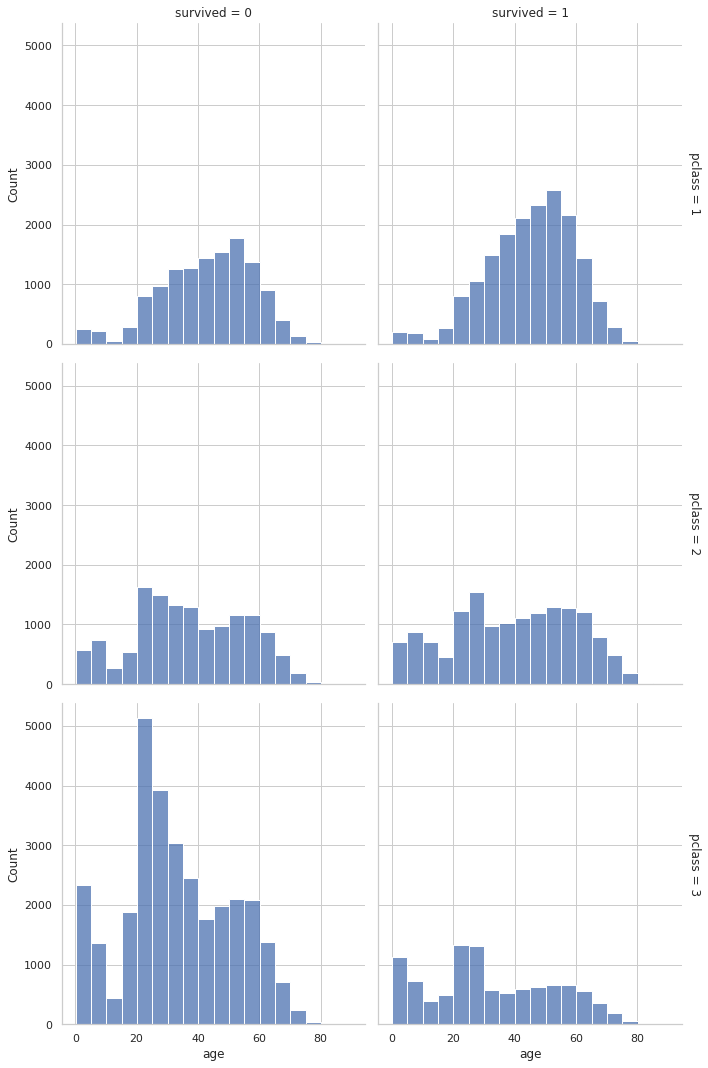

In [279]:
# Рассмотрим распределение пассажиров по  возрасту в зависимости от класса и целевого показателя выживания 
sns.set_theme(style="whitegrid", font='sans-serif', font_scale=1, 
    color_codes=True, rc={"figure.figsize": (15, 10)})

sns.displot(df, x='age', col="survived", row="pclass",
    binwidth=5, height=5, facet_kws=dict(margin_titles=True),)
plt.show();

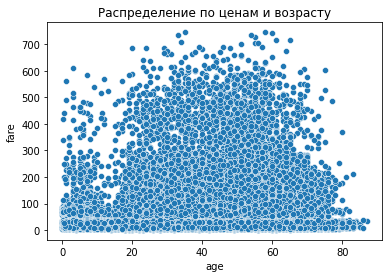

In [9]:
sns.scatterplot(df['age'], df['fare'])
plt.title('Распределение по ценам и возрасту')
plt.show()

Рассчитаем процентное соотношение выживших пассажиров к общему количеству в зависимости от класса

In [333]:
df.groupby('pclass').survived.sum()

pclass
1    17576
2    15057
3    10141
Name: survived, dtype: int64

In [334]:
df.groupby('pclass').survived.sum()/df.groupby('pclass').survived.count()

pclass
1    0.579779
2    0.525018
3    0.247305
Name: survived, dtype: float64

In [335]:
df.groupby('pclass').survived.count()

pclass
1    30315
2    28679
3    41006
Name: survived, dtype: int64

Среди пассажиров первого класса  наблюдается  процент выживших - 58% (17576 -выживших из 30315),схожий показатель и во втором классе процент выживших - 52% (15057 -выживших из 28679),  пассажиры третьего класса - имеют наихудший процент выживших - 25% (10141 -выживших из 41006)

## Выявление зависимостей в данных

<a id='task3_2'></a>

In [336]:
df.pivot_table(
    index=['survived', 'sex'], columns='pclass', values=['passenger_id', 'age', 'fare'], 
    aggfunc={'passenger_id':'count', 'age':'mean', 'fare':'mean'})

age                              fare             \
pclass                   1          2          3           1          2   
survived sex                                                              
0        female  46.838903  36.788929  30.444869   88.945852  28.023061   
         male    41.774523  37.818247  34.228567   67.952585  21.767714   
1        female  46.924644  40.099945  33.276529  110.387516  27.950501   
         male    42.753819  37.805242  32.051150   95.809409  27.635256   

                           passenger_id                
pclass                   3            1      2      3  
survived sex                                           
0        female  23.516148         3727   3530   5403  
         male    18.785176         9012  10092  25462  
1        female  24.260972        12357  11753   7116  
         male    22.199460         5219   3304   3025

Рассмотрим распределение пассажиров по каютам

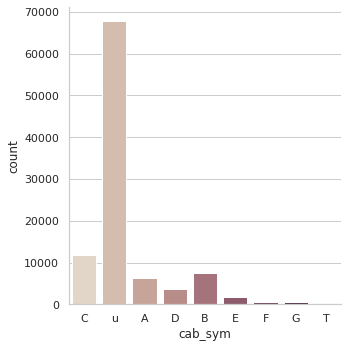

In [337]:
sns.catplot(x="cab_sym", kind="count", palette="ch:.25", data=df)

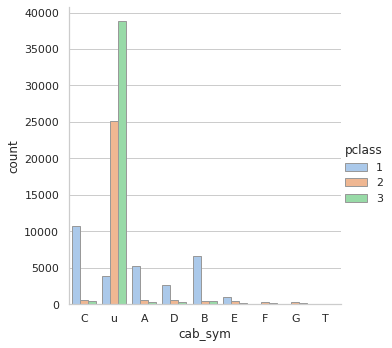

In [338]:
#распределение пассажиров по каютам в зависимости от класса
sns.catplot(x="cab_sym", hue="pclass", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

В каютах под номерами C,B, A, D в основном расположились пассажиры 1 класса

In [339]:
# Разделим датасет на выживших и нет
no_live = df[df['survived'] == 0]
live = df[df['survived'] == 1]

In [212]:
#распределение выживших по каютам в %
live.cab_sym.value_counts(normalize=True)

u    0.542783
C    0.196895
B    0.109599
D    0.062257
A    0.040492
E    0.025249
F    0.012975
G    0.009422
T    0.000327
Name: cab_sym, dtype: float64

**40 % процентов выживших располагались в каютах под номерами C,B, A, D**

In [213]:
no_live.cab_sym.value_counts(normalize=True)

u    0.780222
A    0.079946
C    0.059466
B    0.048073
D    0.017020
E    0.011690
F    0.001887
G    0.001380
T    0.000315
Name: cab_sym, dtype: float64

In [340]:
# Разделим датасет на мужчин и женщин
mans = df[df['sex'] == 'male']
womens = df[df['sex'] == 'female']

In [214]:
#распределение мужчин по каютам в %
mans.cab_sym.value_counts(normalize=True)

u    0.750900
C    0.081744
A    0.074990
B    0.052393
D    0.022918
E    0.014720
F    0.001461
G    0.000659
T    0.000214
Name: cab_sym, dtype: float64

In [341]:
#распределение женщин по каютам в %
womens.cab_sym.value_counts(normalize=True)

u    0.586292
C    0.164927
B    0.102516
D    0.053571
A    0.047828
E    0.021032
F    0.013239
G    0.010140
T    0.000456
Name: cab_sym, dtype: float64

35% женщин и 22% мужчин  располагались в каютах под номерами под номерами C,B, A, D, 

Рассмотрим распределение пассажиров в зависимости от порта отправления  C = Cherbourg, Q = Queenstown, S = Southampton

In [216]:
live.embarked.value_counts(normalize=True)

S    0.533689
C    0.390588
Q    0.075724
Name: embarked, dtype: float64

In [217]:
no_live.embarked.value_counts(normalize=True)

S    0.865201
C    0.096599
Q    0.038199
Name: embarked, dtype: float64

In [218]:
df.embarked.value_counts(normalize=True)

S    0.72340
C    0.22235
Q    0.05425
Name: embarked, dtype: float64

In [342]:
live.embarked.value_counts()/df.embarked.value_counts()

S    0.315565
C    0.751383
Q    0.597051
Name: embarked, dtype: float64

Из пассажиров отправившихся из Cherbourg выжило 75%, из Queenstown -60%, худший процент у пассажиров из Southampton - 31%

Рассмотрим распределение пассажиров в зависимости от порта отправления по классам

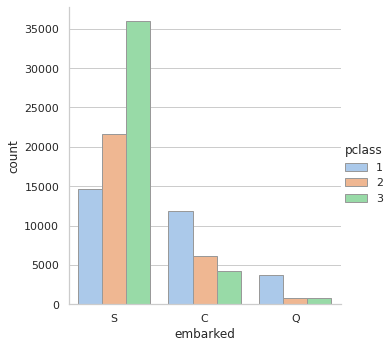

In [343]:

sns.catplot(x="embarked", hue="pclass", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

Преобладающее большинство пассажиров  отправившихся из Cherbourg и Queenstown, это пассажиры 1 класса 

Рассмотрим распределение пассажиров в зависимости от порта отправления по гендерному признаку


In [347]:
womens.embarked.value_counts()

S    24212
C    15821
Q     3853
Name: embarked, dtype: int64

In [348]:
mans.embarked.value_counts()

S    48128
C     6414
Q     1572
Name: embarked, dtype: int64

In [349]:
df.embarked.value_counts()

S    72340
C    22235
Q     5425
Name: embarked, dtype: int64

In [350]:
womens.embarked.value_counts() / df.embarked.value_counts()

S    0.334697
C    0.711536
Q    0.710230
Name: embarked, dtype: float64

71%  пассажиров отправившихся из Cherbourg и Queenstown, это женщины, из Southampton отправилось 33% женщин

Создадим бинарный признак по полу

In [351]:
df['is_female'] = df['sex'].map({'female':1, 'male':0}) 

Разобьем признак embarked по городам

In [372]:
df = pd.get_dummies(df, columns=['embarked'])

In [419]:
df.groupby('survived')['parch'].sum()/df.groupby('survived')['parch'].count()

survived
0    0.435379
1    0.480222
Name: parch, dtype: float64

In [422]:
df = pd.get_dummies(df, columns=['cab_sym'])

In [423]:
df.head()

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,embarked_S,cab_sym_A,cab_sym_B,cab_sym_C,cab_sym_D,cab_sym_E,cab_sym_F,cab_sym_G,cab_sym_T,cab_sym_u
0,0,1,1,"Oconnor, Frankie",male,41.00,2,0,209245,27.14,...,1,0,0,1,0,0,0,0,0,0
1,1,0,3,"Bryan, Drew",male,46.50,0,0,27323,13.35,...,1,0,0,0,0,0,0,0,0,1
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,...,1,0,0,0,0,0,0,0,0,1
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,...,1,0,0,0,0,0,0,0,0,1
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,...,1,0,0,0,0,0,0,0,0,1


Создадим категориальный признак  по возрасту , разбив его на 10 категорий, и проведем группировку по выжившим

In [428]:
df['age_cat'] = pd.cut(df['age'], [0, 5, 10, 15, 20, 30, 40 ,50, 60 ,70,  np.inf])

In [429]:
a = df.groupby(['age_cat', 'is_female', 'pclass'])['survived'].sum().reset_index()

In [430]:
b =df.groupby(['age_cat', 'is_female', 'pclass'])['name'].count().reset_index()

Объединим в одну таблицу

In [431]:
age_df = a.merge(b, on=['age_cat', 'is_female', 'pclass'], how='left').rename(columns={'name':'all'})

In [432]:
port = df.groupby(['age_cat', 'is_female', 'pclass'])['embarked_C', 'embarked_Q', 'embarked_S'].sum().reset_index()

In [433]:
age_df['%'] = age_df['survived']/age_df['all']

In [434]:
sym =df.groupby(['age_cat', 'is_female', 'pclass'])[df.columns[-9:-1]].sum().reset_index()

In [435]:
age_df = age_df.merge(port, on=['age_cat', 'is_female', 'pclass'], how='outer')

In [436]:
age_df = age_df.merge(sym, on=['age_cat', 'is_female', 'pclass'], how='outer')

In [437]:
age_df.sort_values(by='%', ascending=False)

,age_cat,is_female,pclass,survived,all,%,embarked_C,embarked_Q,embarked_S,cab_sym_A,cab_sym_B,cab_sym_C,cab_sym_D,cab_sym_E,cab_sym_F,cab_sym_G,cab_sym_T
58,"(70.0, inf]",1,2,651,777,0.837838,365.0,39.0,373.0,3.0,14.0,13.0,25.0,18.0,34.0,41.0,1.0
16,"(10.0, 15.0]",1,2,678,824,0.822816,327.0,35.0,462.0,3.0,4.0,9.0,11.0,9.0,36.0,43.0,2.0
40,"(40.0, 50.0]",1,2,1694,2132,0.794559,721.0,64.0,1347.0,52.0,53.0,70.0,82.0,80.0,46.0,31.0,1.0
52,"(60.0, 70.0]",1,2,1703,2151,0.791725,800.0,102.0,1249.0,25.0,34.0,58.0,94.0,47.0,64.0,60.0,1.0
33,"(30.0, 40.0]",1,1,2146,2716,0.790133,1524.0,222.0,970.0,292.0,577.0,1288.0,259.0,85.0,12.0,4.0,1.0
39,"(40.0, 50.0]",1,1,3084,3921,0.786534,2114.0,471.0,1336.0,417.0,905.0,1826.0,399.0,115.0,11.0,8.0,2.0
46,"(50.0, 60.0]",1,2,1966,2515,0.781710,849.0,95.0,1571.0,51.0,68.0,83.0,122.0,65.0,57.0,36.0,3.0
27,"(20.0, 30.0]",1,1,1180,1528,0.772251,811.0,155.0,562.0,184.0,308.0,668.0,179.0,35.0,7.0,1.0,0.0
45,"(50.0, 60.0]",1,1,3510,4552,0.771090,2368.0,786.0,1398.0,547.0,1125.0,1946.0,493.0,136.0,18.0,8.0,1.0
22,"(15.0, 20.0]",1,2,302,392,0.770408,115.0,15.0,262.0,4.0,4.0,11.0,5.0,5.0,5.0,6.0,0.0


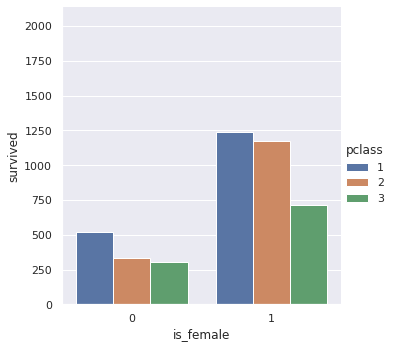

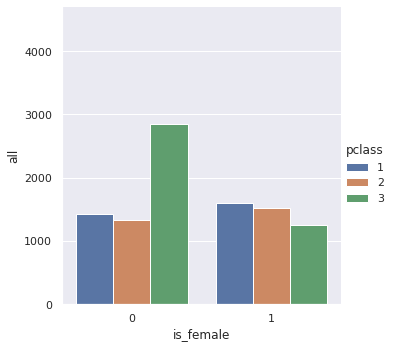

In [438]:
sns.catplot(x="is_female", y="survived", hue="pclass", kind="bar", data=age_df, errwidth=0)
sns.catplot(x="is_female", y="all", hue="pclass", kind="bar", data=age_df, errwidth=0)




Рассмотрим распределение выживших и не выживших пассажиров по возрастным категориям 

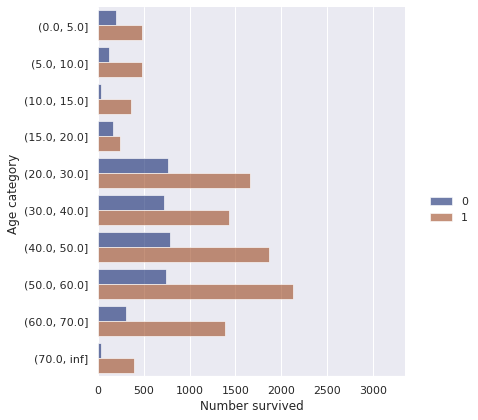

In [439]:

g = sns.catplot(
    data=age_df, kind="bar",
    y="age_cat", x="survived", hue="is_female",
    ci="sd", palette="dark", alpha=.6, height=6, errwidth=0
)
g.despine(left=True)
g.set_axis_labels("Number survived", "Age category ")
g.legend.set_title("")

Выживших женщин выжило значительно больше чем мужчин в категориях от 70, от 60 до 70, от 10 до 15, от 5 до 10

Рассмотрим распределение  пассажиров по возрастным категориям и классу

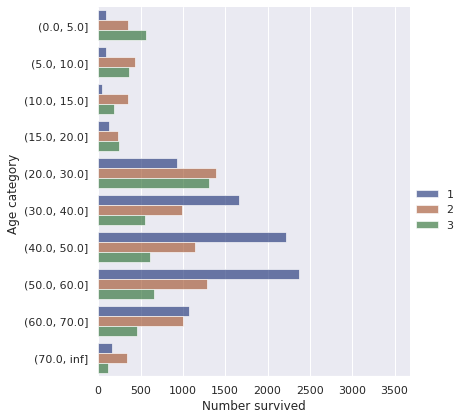

In [440]:
g = sns.catplot(
    data=age_df, kind="bar",
    y="age_cat", x="survived", hue="pclass",
    ci="sd", palette="dark", alpha=.6, height=6, errwidth=0
)
g.despine(left=True)
g.set_axis_labels("Number survived", "Age category ")

g.legend.set_title("")

В категориях от 30 до 70 преобладают пассажиры 1 класса

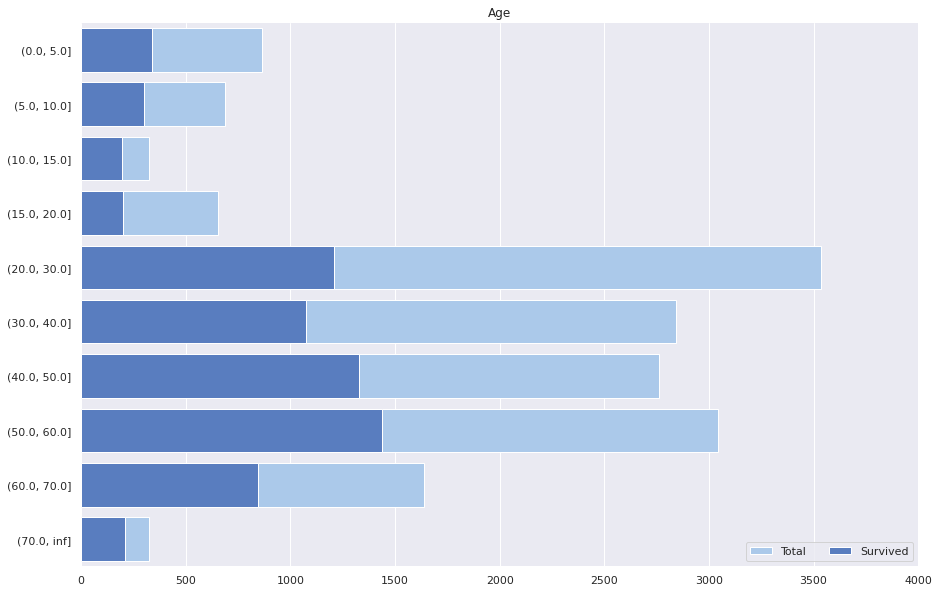

In [441]:
sns.set_theme()

f, ax = plt.subplots(figsize=(15, 10))

sns.set_color_codes("pastel")
sns.barplot(x="all", y="age_cat",  data=age_df,
            label="Total", color="b", errwidth=0)


sns.set_color_codes("muted")
sns.barplot(x="survived", y="age_cat", data=age_df,
            label="Survived", color="b", errwidth=0)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 4000), ylabel="",
       xlabel="")
plt.title('Age')
sns.despine(left=True, bottom=True)

Самый низкий процент смертности у пассажиров возрастной категории старше 70 и  категории от10 до 15, самый высокий в категории от 15 до 20 и от 20 до 30

In [442]:
df['type_h'] = df.apply((lambda x:'child' if x['age'] < 15 else x['sex']), axis=1)

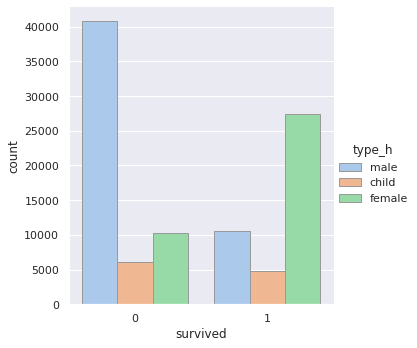

In [443]:
sns.catplot(x="survived", hue="type_h", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

Детей и мужчин погибло больше чем выжило

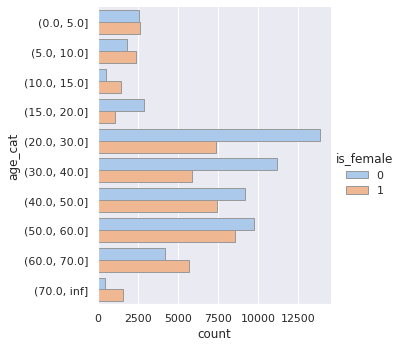

In [444]:
sns.catplot(y="age_cat", hue="is_female", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

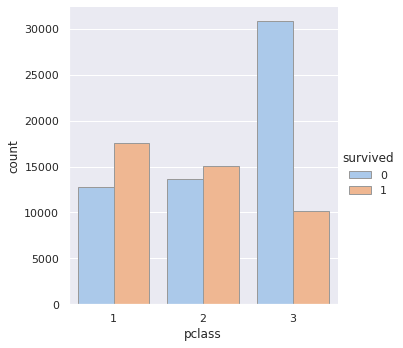

In [445]:
sns.catplot(x="pclass", hue="survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

## Построение корреляционной матрицы

<a id='task3_3'></a>

In [446]:
df.corr()

,passenger_id,survived,pclass,age,sibsp,parch,fare,is_female,embarked_C,embarked_Q,embarked_S,cab_sym_A,cab_sym_B,cab_sym_C,cab_sym_D,cab_sym_E,cab_sym_F,cab_sym_G,cab_sym_T,cab_sym_u
passenger_id,1.000000,0.001956,-0.000893,-0.002281,0.001000,0.000411,-0.001024,-0.000493,0.004414,-0.003114,-0.002526,0.001417,0.004412,-0.005680,0.005904,0.002819,0.001740,-0.004146,0.000178,-0.002142
survived,0.001956,1.000000,-0.289723,0.104851,-0.007587,0.023352,0.187518,0.507260,0.349789,0.081961,-0.366666,-0.080300,0.116006,0.210568,0.119552,0.051172,0.067597,0.057442,0.000353,-0.251554
pclass,-0.000893,-0.289723,1.000000,-0.259367,-0.051436,-0.041848,-0.417458,-0.198617,-0.289371,-0.184608,0.362480,-0.275106,-0.317816,-0.424031,-0.173809,-0.091425,0.004136,0.003873,-0.006288,0.709274
age,-0.002281,0.104851,-0.259367,1.000000,-0.110698,-0.124852,0.108483,0.083775,0.102638,0.151898,-0.172330,0.064306,0.118810,0.117419,0.083372,0.042692,0.015533,0.021058,0.001200,-0.232699
sibsp,0.001000,-0.007587,-0.051436,-0.110698,1.000000,0.213126,0.059405,0.030627,-0.019534,-0.030733,0.033722,0.117740,0.066607,-0.030399,-0.021885,-0.003941,-0.002381,-0.002291,-0.003063,-0.066946
parch,0.000411,0.023352,-0.041848,-0.124852,0.213126,1.000000,0.061565,0.087666,0.013817,-0.007760,-0.008915,0.092058,0.129943,-0.055094,-0.023402,-0.001929,0.006826,0.013815,-0.001498,-0.076096
fare,-0.001024,0.187518,-0.417458,0.108483,0.059405,0.061565,1.000000,0.143538,0.212799,0.101399,-0.249164,0.124605,0.202196,0.354628,0.091228,0.023688,-0.011157,-0.004276,0.003006,-0.464451
is_female,-0.000493,0.507260,-0.198617,0.083775,0.030627,0.087666,0.143538,1.000000,0.293815,0.130971,-0.339451,-0.055449,0.094789,0.127838,0.081254,0.023894,0.072018,0.067929,0.006711,-0.174921
embarked_C,0.004414,0.349789,-0.289371,0.102638,-0.019534,0.013817,0.212799,0.293815,1.000000,-0.128067,-0.864748,0.005702,0.039586,0.281721,0.148153,0.038729,0.037214,0.037788,0.006568,-0.302596
embarked_Q,-0.003114,0.081961,-0.184608,0.151898,-0.030733,-0.007760,0.101399,0.130971,-0.128067,1.000000,-0.387324,-0.036169,0.351704,0.011826,0.046620,0.040453,-0.002702,-0.006469,-0.001817,-0.215520


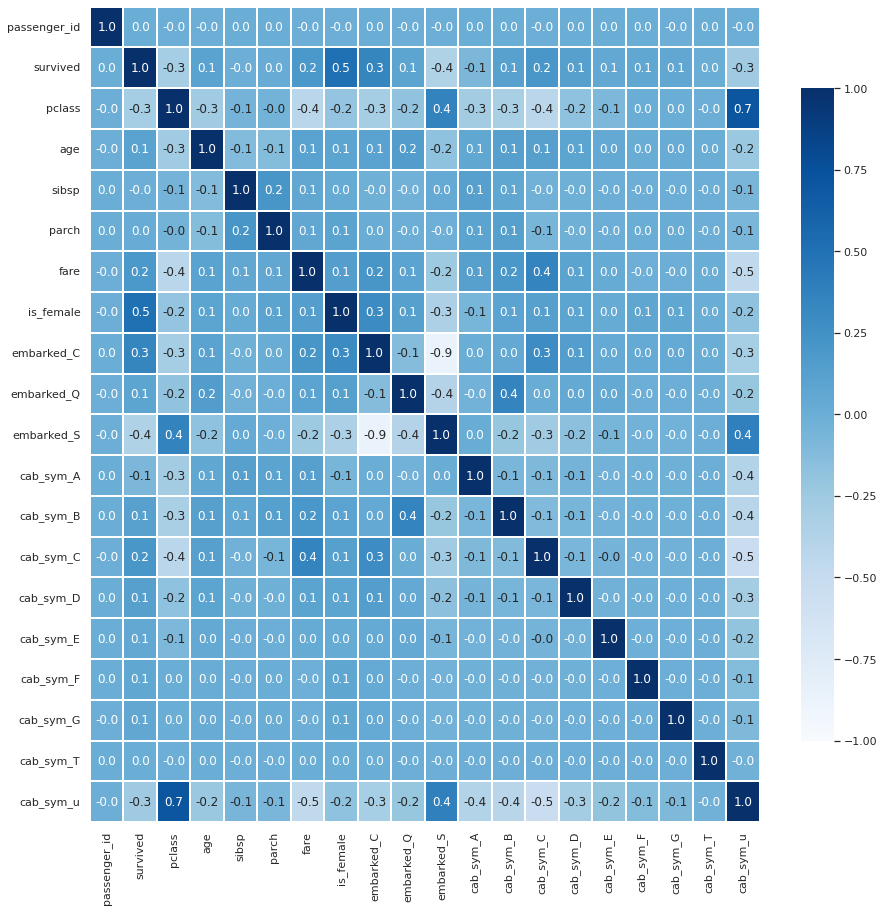

In [448]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8}, linewidth=0.3)
plt.show()

У целевого признака - выживание обнаруживается средняя прямая корреляция между полом = 0.5, слабая отрицательная корреляция с классом = -0.3, слабая прямая с потом отправления - С = 0.3, слабая отрицателльная с портом отправления S= -0.4, и слабая отрицательная корреляция с номером каюты 'unknown' = -0.3  

# Общий вывод

<a id='task6'></a>

___

  * Из 100_000 пассажиров погибло -57226, выжило -  42774
  * Средне значение возраста - 38, медиана -38, ст.откл.-18 
  * среднее значение цены - 44, медиана- 24, ст.откл. - 69
  * медианные значения цены за билет у выживших пассажиров выше чем у погибших 
  * Среди женщин наблюдается намного больший процент выживших - 71% (31226 -выживших из 43886), по сравынению с мужчинами-20%(11548 - выживших из 56114), т.е. среди погибших всего 29 % составляют женщины и почти 80% - мужчины 
  * Среди пассажиров первого класса наблюдается процент выживших - 58% (17576 -выживших из 30315),схожий показатель и во втором классе процент выживших - 52% (15057 -выживших из 28679), пассажиры третьего класса - имеют наихудший процент выживших - 25% (10141 -выживших из 41006)
  * В каютах под номерами C,B, A, D в основном расположились пассажиры 1 класса
  * 40 % процентов выживших располагались в каютах под номерами C,B, A, D
  * 35% женщин и 22% мужчин располагались в каютах под номерами под номерами C,B, A, D,
  * Из пассажиров отправившихся из Cherbourg выжило 75%, из Queenstown -60%, худший процент у пассажиров из Southampton - 31%
  * Преобладающее большинство пассажиров отправившихся из Cherbourg и Queenstown, это пассажиры 1 класса
  * Выживших женщин выжило значительно больше чем мужчин в категориях от 70, от 60 до 70, от 10 до 15, от 5 до 10
  * В категориях от 30 до 70 преобладают пассажиры 1 класса
  * Самый низкий процент выживаемости у пассажиров возрастной категории старше 70 и категории от10 до 15, самый высокий в категории от 15 до 20 и от 20 до 30
  * Детей и мужчин погибло больше чем выжило, женщин выжило больше чем погибло



**У целевого признака - выживание обнаруживается средняя прямая корреляция между полом = 0.5, слабая отрицательная корреляция с классом = -0.3, слабая прямая с потом отправления - С = 0.3, слабая отрицателльная с портом отправления S= -0.4, и слабая отрицательная корреляция с номером каюты 'unknown' = -0.3  **